In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px
from wordcloud import WordCloud

# Ввод параметров для поиска и парсинг с сайта hh.ru

Переменные для ввода периода, в который ищем вакансии:

(Ввод даты в формате YYYY-MM-DD)

"date_from" - начало периода

"date_to" - конец периода

"professional_role" - код профессии (См. https://api.hh.ru/professional_roles)

In [ ]:
date_from = '2025-02-01'
date_to = '2025-02-22'
professional_role = '48'

In [ ]:
page_number=1

params = {
      # 'text': '"Machine Learning Engineer" OR "Data Scientist"',
        'area': 1,
        'date_from': date_from,
        'date_to': date_to,
        'professional_role': professional_role,
        'page': 0
    }

headers = {
        'User-Agent': 'api-test-agent'
    }

url = 'https://api.hh.ru/vacancies'

response = requests.get(url, headers=headers, params=params)
    # data = pd.DataFrame(response.json())
    # data
data = pd.DataFrame(response.json()['items'])

while page_number<50:

    params = {
      # 'text': '"Machine Learning Engineer" OR "Data Scientist"',
        'area': 1,
        'date_from': date_from,
        'date_to': date_to,
        'professional_role': professional_role,
        'page': page_number
    }

    headers = {
        'User-Agent': 'api-test-agent'
    }

    url = 'https://api.hh.ru/vacancies'

    response = requests.get(url, headers=headers, params=params)
    if not response.json()['items']:
        break
    # data = pd.DataFrame(response.json())
    # data
    data = pd.concat([data,pd.DataFrame(response.json()['items'])])
    page_number+=1

In [ ]:
response.json()

{'items': [{'id': '80361959',
   'premium': False,
   'name': 'Ведущий инженер-проектировщик ОВИК',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': None,
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Волочаевская улица',
    'building': '5/1',
    'lat': 55.75438,
    'lng': 37.681416,
    'description': None,
    'raw': 'Москва, Волочаевская улица, 5/1',
    'metro': {'station_name': 'Площадь Ильича',
     'line_name': 'Калининская',
     'station_id': '8.112',
     'line_id': '8',
     'lat': 55.747115,
     'lng': 37.680726},
    'metro_stations': [{'station_name': 'Площадь Ильича',
      'line_name': 'Калининская',
      'station_id': '8.112',
      'line_id': '8',
      'lat': 55.747115,
      'lng': 37.680726},
     {'station_name': 'Римская',
      'line_name': 'Люблинско-Дмитровская',
      'station_id': '

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         1000 non-null   object
 1   premium                    1000 non-null   bool  
 2   name                       1000 non-null   object
 3   department                 34 non-null     object
 4   has_test                   1000 non-null   bool  
 5   response_letter_required   1000 non-null   bool  
 6   area                       1000 non-null   object
 7   salary                     632 non-null    object
 8   type                       1000 non-null   object
 9   address                    826 non-null    object
 10  response_url               0 non-null      object
 11  sort_point_distance        0 non-null      object
 12  published_at               1000 non-null   object
 13  created_at                 1000 non-null   object
 14  archived       

# Таблица с вакансиями

### Таблица до обратки столбцов и значений в них

In [ ]:
data

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,professional_roles,accept_incomplete_resumes,experience,employment,employment_form,internship,adv_response_url,is_adv_vacancy,adv_context,branding
0,117106992,False,Инженер по строительному контролю,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Малый Харитоньев...",...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
1,115257427,False,Инженер,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 84000, 'to': 142000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Ленинская ...",...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
2,117469697,False,Инженер-конструктор,None,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': 300000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
3,117538180,False,BIM Менеджер \ Координатор,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Дмитровское шосс...",...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
4,117550325,False,Инженер-конструктор (авиационная техника),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 200000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Пехорская улица'...",...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,115426128,False,"Главный специалист/инженер-проектировщик ВК, НВК",None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",{'city': 'Новомосковский административный окру...,...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
16,116854085,False,Инженер (электроснабжение),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': None, 'street': None, 'building': Non...",...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",True,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
17,117217570,False,Инженер-конструктор,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'улица Шверника',...",...,"[{'id': '48', 'name': 'Инженер-конструктор, ин...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,None,False,None,NaN
18,107007216,False,Специалист по работе с технической документацией,None,True

In [ ]:
def work_format_from_dict(x):
  names = ''
  for i in range(len(x)):
    names += x[i]['name'] + ' '
  return names

In [ ]:
cleared_data=data[['name','salary','employer','snippet','internship','employment','work_format','experience']]
cleared_data['employer']=cleared_data['employer'].apply(lambda x: x['name'])
cleared_data['requirement']=cleared_data['snippet'].apply(lambda x: x['requirement'])
cleared_data['responsibility']=cleared_data['snippet'].apply(lambda x: x['responsibility'])
cleared_data['employment']=cleared_data['employment'].apply(lambda x: x['name'])
#cleared_data['salary']=cleared_data['salary'].apply(lambda x: f'from {x['from']} to {x['to']}')
cleared_data['salary_from(RUB)']=cleared_data['salary'].apply(lambda x: x['from'] if x else None).apply(lambda x: x*90 if x<20000 else x)
cleared_data['salary_to(RUB)']=cleared_data['salary'].apply(lambda x: x['to'] if x else None).apply(lambda x: x*90 if x<20000 else x)
cleared_data['currency']=cleared_data['salary'].apply(lambda x: x['currency'] if x else None)
cleared_data['work_format']=cleared_data['work_format'].apply(work_format_from_dict)
cleared_data['experience']=cleared_data['experience'].apply(lambda x: x['name'])

<ipython-input-10-7c36bc2e08f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleared_data['employer']=cleared_data['employer'].apply(lambda x: x['name'])
<ipython-input-10-7c36bc2e08f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleared_data['requirement']=cleared_data['snippet'].apply(lambda x: x['requirement'])
<ipython-input-10-7c36bc2e08f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

P.S. Здесь надо допилить нормальную функцию для конвертации валюты, но для данной задачи, где только доллары и евро помимо рубля, будем думать, что евро=доллар=90рублей

### Исследование на наличие дубликатов

In [ ]:
data_without_duplicates=cleared_data.drop_duplicates(subset=['employer', 'requirement','responsibility','internship'])
duplicates=pd.concat([data_without_duplicates,cleared_data])
duplicates.drop_duplicates(subset=['employer', 'requirement','responsibility','internship'],keep=False)

,name,salary,employer,snippet,internship,employment,work_format,experience,requirement,responsibility,salary_from(RUB),salary_to(RUB),currency


### Таблица после обратки

In [ ]:
cleared_data.drop(columns=['salary','snippet'])

,name,employer,internship,employment,work_format,experience,requirement,responsibility,salary_from(RUB),salary_to(RUB),currency
0,Инженер по строительному контролю,ГАУК Московское агентство организации отдыха и...,False,Полная занятость,,От 3 до 6 лет,Образование высшее (строительное). Зниние осно...,"Организация мероприятий по строительству, капи...",120000.0,NaN,RUR
1,Инженер,ТУРКОВ,False,Полная занятость,На месте работодателя,Нет опыта,"Образование: высшее техническое, средний балл ...",Подбор оборудования для клиентов компании. Под...,84000.0,142000.0,RUR
2,Инженер-конструктор,БурцевАудио,False,Полная занятость,На месте работодателя,Более 6 лет,Требования к инженеру-конструктору: * высшее т...,Инженер-конструктор: * анализирует и разрабаты...,200000.0,300000.0,RUR
3,BIM Менеджер \ Координатор,ИЦПР,False,Полная занятость,На месте работодателя Гибрид,От 1 года до 3 лет,Опыт работы в области проектирования от 1 до 3...,Управление и координация BIM-процессов на всех...,150000.0,250000.0,RUR
4,Инженер-конструктор (авиационная техника),Центр Автономных Роботизированных Систем,False,Полная занятость,На месте работодателя,Нет опыта,"Высшее техническое (МАИ, МГТУ им М.Э. Баумана,...","Разработка поверхностей составных частей, дета...",200000.0,NaN,RUR
...,...,...,...,...,...,...,...,...,...,...,...
15,"Главный специалист/инженер-проектировщик ВК, НВК",Энсис Технологии,False,Полная занятость,,От 3 до 6 лет,Высшее профильное образование. Знание норматив...,Разработка подраздела «Система водоснабжения и...,NaN,NaN,None
16,Инженер (электроснабжение),Правительство Москвы,False,Полная занятость,На месте работодателя,От 3 до 6 лет,Высшее инженерно-техническое образование. Опыт...,Выполнение мероприятий по исправной и беспереб...,NaN,NaN,None
17,Инженер-конструктор,ЦНИИ Дельфин,False,Полная занятость,На месте работодателя,От 3 до 6 лет,Высшее техническое образование профильное. Опы...,"Разработка эскизных, технических и рабочих про...",NaN,NaN,None
18,Специалист по работе с технической документацией,Российские космические системы,False,Полная занятость,,Нет опыта,Знания стандартов Единой системы конструкторск...,Разработка и оформление документов в соответст...,65000.0,80000.0,RUR


### Запись таблицы в файл csv

In [ ]:
cleared_data.drop(columns=['salary','snippet']).to_csv('hh.csv')

# Анализ найденных вакансий

### Зарплата

In [ ]:
cleared_data['currency'].unique()

array(['RUR', None], dtype=object)

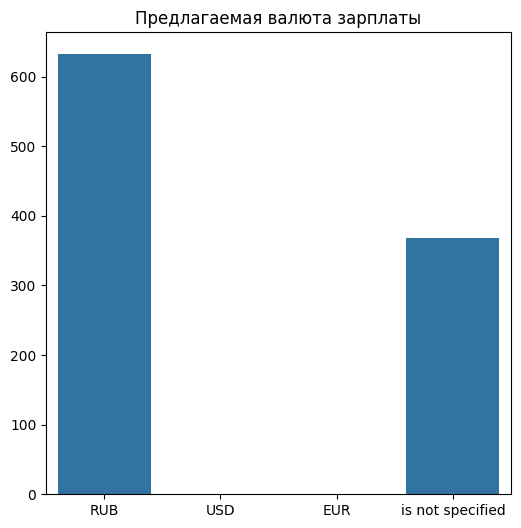

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(y=[cleared_data[cleared_data['currency']=='RUR']['currency'].count(),
             cleared_data[cleared_data['currency']=='USD']['currency'].count(),
             cleared_data[cleared_data['currency']=='EUR']['currency'].count(),
             cleared_data['currency'].isna().sum()
             ],
            x=['RUB', 'USD', 'EUR', 'is not specified'])
plt.title('Предлагаемая валюта зарплаты')
plt.show()

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{round(pct,1)}% ({val})'
    return my_autopct

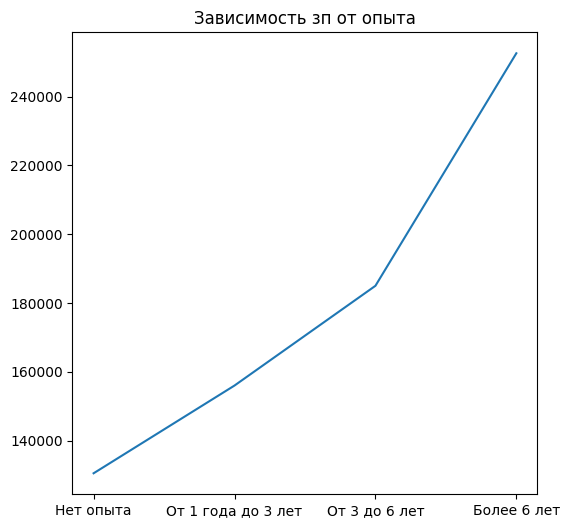

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
    cleared_data.groupby('experience')['salary_to(RUB)'].mean().sort_values()
             )
plt.title('Зависимость зп от опыта')
plt.show()

In [ ]:
def exp_convert(x):
  if x=='Нет опыта': return 0
  elif x=='От 1 года до 3 лет': return 1
  elif x=='От 3 до 6 лет': return 2
  elif x=='Более 6 лет': return 3
  else: return x


In [ ]:
corr_data = cleared_data
corr_data['experience_con']=corr_data['experience'].apply(exp_convert)

<ipython-input-17-67575938d7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_data['experience_con']=corr_data['experience'].apply(exp_convert)


Text(0.5, 1.0, 'Корреляция потолка зп и опыта работы')

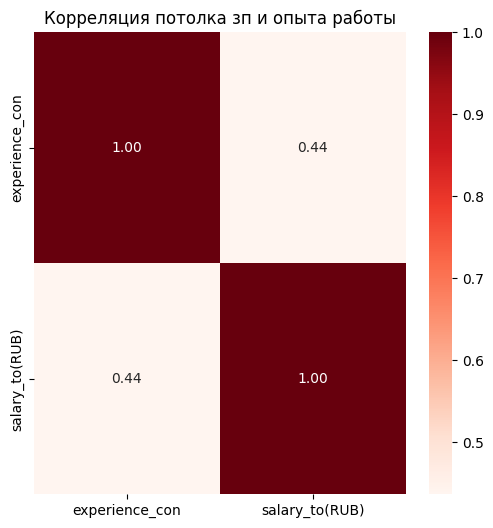

In [ ]:
plt.figure(figsize=(6,6))
corr_matrix = cleared_data[['experience_con', 'salary_to(RUB)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Корреляция потолка зп и опыта работы')

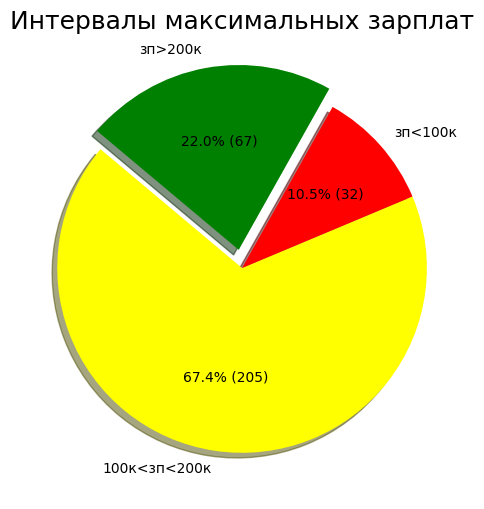

In [ ]:
plt.figure(figsize = (6,6))

labels = ['100к<зп<200к','зп<100к','зп>200к']
colors = ['Yellow','Red','Green']

explode = (0, 0, 0.1)

salary = [cleared_data[(cleared_data['salary_to(RUB)'] >100000)&(cleared_data['salary_to(RUB)'] <200000)]['salary_to(RUB)'].count(),
             cleared_data[(cleared_data['salary_to(RUB)'] <100000)]['salary_to(RUB)'].count(),
             cleared_data[(cleared_data['salary_to(RUB)'] >200000)]['salary_to(RUB)'].count()
]

fig=plt.pie(salary,
        labels=labels, explode=explode, colors=colors,
        autopct=make_autopct(salary),
        shadow=True,
        startangle=140)

plt.title('Интервалы максимальных зарплат', fontsize=18)

plt.show();

### Формат работы

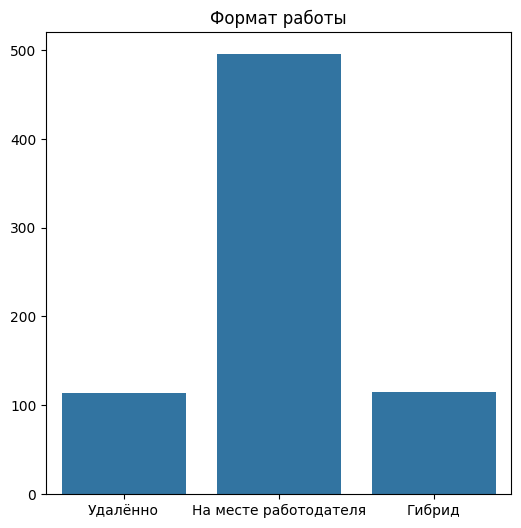

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(y=[cleared_data['work_format'].str.contains('Удалённо').sum(),
             cleared_data['work_format'].str.contains('На').sum(),
             cleared_data['work_format'].str.contains('Гибрид').sum()
             ],
            x=['Удалённо', 'На месте работодателя', 'Гибрид'])
plt.title('Формат работы')
plt.show()

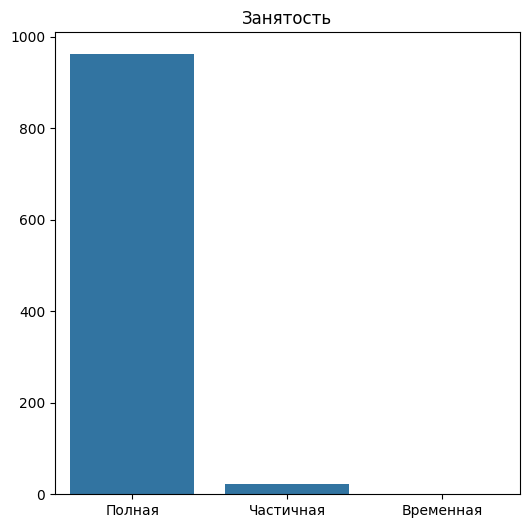

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(y=[cleared_data['employment'].str.contains('Полная').sum(),
             cleared_data['employment'].str.contains('Частичная').sum(),
             cleared_data['employment'].str.contains('Временная ').sum()
             ],
            x=['Полная', 'Частичная', 'Временная'])
plt.title('Занятость')
plt.show()

### Вакансии каких компаний есть на рынке в указанный период?

In [ ]:
name = ''
for i in cleared_data['employer']:
  name += i.replace(" ", "'") + ' '

(-0.5, 1919.5, 1079.5, -0.5)

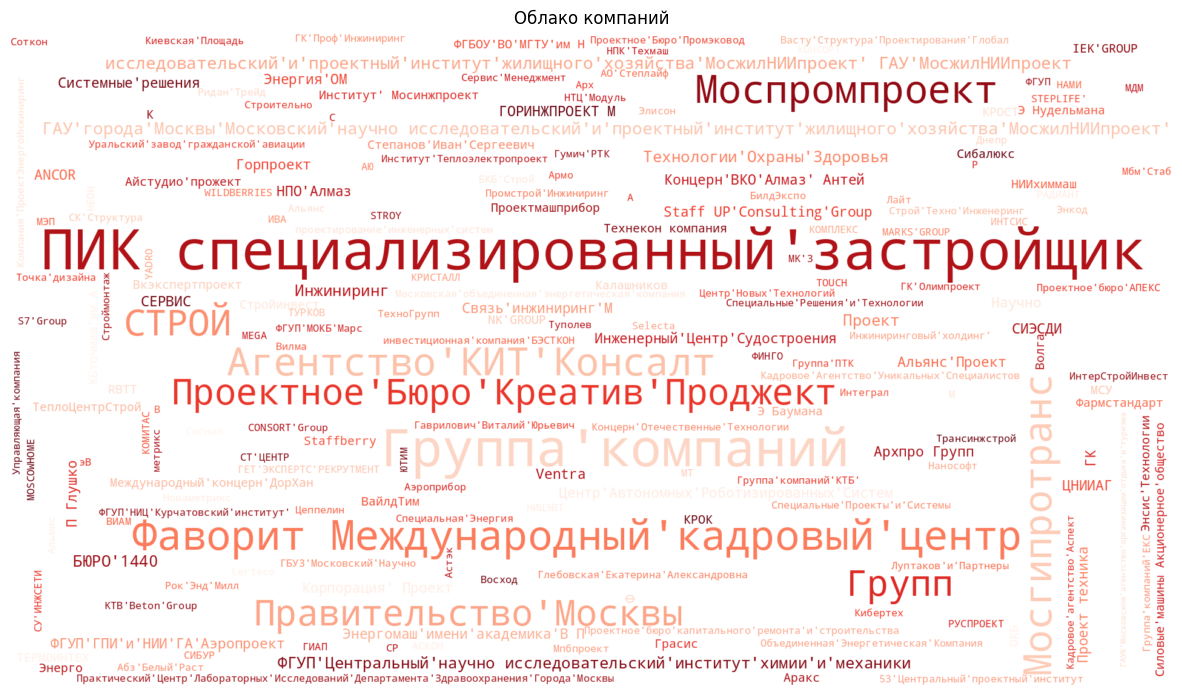

In [ ]:
wordcloud_companies= WordCloud(width=1920, height=1080,background_color = 'white', colormap='Reds').generate(name)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_companies, interpolation='bilinear')
plt.title('Облако компаний')
plt.axis('off')

In [ ]:
cleared_data['employer'].value_counts().head(20)

,count
employer,
ПИК-специализированный застройщик,16
"Фаворит, Международный кадровый центр",8
Мосгипротранс,7
Агентство КИТ Консалт,7
Моспромпроект,7
Правительство Москвы,6
ГАУ города Москвы Московский научно-исследовательский и проектный институт жилищного хозяйства МосжилНИИпроект (ГАУ МосжилНИИпроект),6
Проектное Бюро Креатив Проджект,6
БЮРО 1440,5
